In [1]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This notebook was prepared by Anderson B.


Pandas
============
The following are notes taken while working through Pandas(version 0.18.0) Documentation.

# Table of Content

## 1. Data Structures 
| Dimensions | Name      | Description                                                                  |
|------------|-----------|------------------------------------------------------------------------------|
| 1          | Series    | 1D labeled homogeneously-type array                                          |
| 2          | DataFrame | 2D labeled, size-mutable tabular structure with heterogeneously-type columns |
| 3          | Panel     | 3D labeled, also size-mutable array                                          |

In [2]:
pd.__version__

u'0.18.1'

## 2. Series and DataFrame

### Creation

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20160101', periods=6)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABDC'))
df

,A,B,D,C
2016-01-01,0.801671,0.031857,-1.225618,-1.711436
2016-01-02,-0.889030,0.359829,0.518997,1.174663
2016-01-03,0.694779,1.905505,-0.246403,0.364373
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735
2016-01-05,0.917680,1.045710,0.040747,-0.256552
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040


In [7]:
# creating a DataFrame by passing a dict of objects that can be converted
# series-like

df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20161115'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})

In [8]:
df2

,A,B,C,D,E,F
0,1.0,2016-11-15,1.0,3,test,foo
1,1.0,2016-11-15,1.0,3,train,foo
2,1.0,2016-11-15,1.0,3,test,foo
3,1.0,2016-11-15,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing Data

In [12]:
df.head()

,A,B,D,C
2016-01-01,0.801671,0.031857,-1.225618,-1.711436
2016-01-02,-0.889030,0.359829,0.518997,1.174663
2016-01-03,0.694779,1.905505,-0.246403,0.364373
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735
2016-01-05,0.917680,1.045710,0.040747,-0.256552


In [13]:
df.tail(3)

,A,B,D,C
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735
2016-01-05,0.917680,1.045710,0.040747,-0.256552
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040


In [14]:
df.describe()

,A,B,D,C
count,6.000000,6.000000,6.000000,6.000000
mean,0.112809,0.319618,-0.350001,-0.174621
std,0.781015,1.027875,0.602447,0.970036
min,-0.889030,-0.824482,-1.225618,-1.711436
25%,-0.456943,-0.442567,-0.630079,-0.526689
50%,0.168149,0.195843,-0.383918,-0.129296
75%,0.774948,0.874240,-0.031040,0.272770
max,0.917680,1.905505,0.518997,1.174663


In [15]:
# transposing the data
df.T

,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00
A,0.801671,-0.889030,0.694779,-0.489764,0.917680,-0.358480
B,0.031857,0.359829,1.905505,-0.600708,1.045710,-0.824482
D,-1.225618,0.518997,-0.246403,-0.666294,0.040747,-0.521434
C,-1.711436,1.174663,0.364373,-0.616735,-0.256552,-0.002040


In [16]:
# Sorting by an axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2016-01-01,-1.225618,-1.711436,0.031857,0.801671
2016-01-02,0.518997,1.174663,0.359829,-0.889030
2016-01-03,-0.246403,0.364373,1.905505,0.694779
2016-01-04,-0.666294,-0.616735,-0.600708,-0.489764
2016-01-05,0.040747,-0.256552,1.045710,0.917680
2016-01-06,-0.521434,-0.002040,-0.824482,-0.358480


In [17]:
df.sort_values(by='B')

,A,B,D,C
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735
2016-01-01,0.801671,0.031857,-1.225618,-1.711436
2016-01-02,-0.889030,0.359829,0.518997,1.174663
2016-01-05,0.917680,1.045710,0.040747,-0.256552
2016-01-03,0.694779,1.905505,-0.246403,0.364373


### Selection


In [18]:
df['A']

2016-01-01    0.801671
2016-01-02   -0.889030
2016-01-03    0.694779
2016-01-04   -0.489764
2016-01-05    0.917680
2016-01-06   -0.358480
Freq: D, Name: A, dtype: float64

In [19]:
df[0:3]

,A,B,D,C
2016-01-01,0.801671,0.031857,-1.225618,-1.711436
2016-01-02,-0.889030,0.359829,0.518997,1.174663
2016-01-03,0.694779,1.905505,-0.246403,0.364373


In [20]:
# selection by label
df.loc[dates[0]]

A    0.801671
B    0.031857
D   -1.225618
C   -1.711436
Name: 2016-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:, ['A', 'B']]

,A,B
2016-01-01,0.801671,0.031857
2016-01-02,-0.889030,0.359829
2016-01-03,0.694779,1.905505
2016-01-04,-0.489764,-0.600708
2016-01-05,0.917680,1.045710
2016-01-06,-0.358480,-0.824482


In [22]:
df.loc[dates[0], 'A']

0.80167122482150577

In [23]:
df.at[dates[0], 'A']

0.80167122482150577

In [24]:
# Selection by Position
df.iloc[3]

A   -0.489764
B   -0.600708
D   -0.666294
C   -0.616735
Name: 2016-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5, 0:2]

,A,B
2016-01-04,-0.489764,-0.600708
2016-01-05,0.917680,1.045710


In [27]:
df.iat[1,1]

0.3598292258712979

In [28]:
# Boolean Indexing
df[df.A > 0]

,A,B,D,C
2016-01-01,0.801671,0.031857,-1.225618,-1.711436
2016-01-03,0.694779,1.905505,-0.246403,0.364373
2016-01-05,0.917680,1.045710,0.040747,-0.256552


In [29]:
df[df > 0]

,A,B,D,C
2016-01-01,0.801671,0.031857,NaN,NaN
2016-01-02,NaN,0.359829,0.518997,1.174663
2016-01-03,0.694779,1.905505,NaN,0.364373
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.917680,1.045710,0.040747,NaN
2016-01-06,NaN,NaN,NaN,NaN


In [30]:
df

,A,B,D,C
2016-01-01,0.801671,0.031857,-1.225618,-1.711436
2016-01-02,-0.889030,0.359829,0.518997,1.174663
2016-01-03,0.694779,1.905505,-0.246403,0.364373
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735
2016-01-05,0.917680,1.045710,0.040747,-0.256552
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040


In [31]:
df2 = df.copy()

In [32]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [33]:
df2

,A,B,D,C,E
2016-01-01,0.801671,0.031857,-1.225618,-1.711436,one
2016-01-02,-0.889030,0.359829,0.518997,1.174663,one
2016-01-03,0.694779,1.905505,-0.246403,0.364373,two
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735,three
2016-01-05,0.917680,1.045710,0.040747,-0.256552,four
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040,three


In [34]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,D,C,E
2016-01-03,0.694779,1.905505,-0.246403,0.364373,two
2016-01-05,0.917680,1.045710,0.040747,-0.256552,four


In [35]:
# Setting
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20160101', periods=6))

In [36]:
s1

2016-01-01    1
2016-01-02    2
2016-01-03    3
2016-01-04    4
2016-01-05    5
2016-01-06    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1

In [38]:
df

,A,B,D,C,F
2016-01-01,0.801671,0.031857,-1.225618,-1.711436,1
2016-01-02,-0.889030,0.359829,0.518997,1.174663,2
2016-01-03,0.694779,1.905505,-0.246403,0.364373,3
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735,4
2016-01-05,0.917680,1.045710,0.040747,-0.256552,5
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040,6


In [40]:
df.at[dates[0], 'A'] = 0

In [41]:
df

,A,B,D,C,F
2016-01-01,0.000000,0.031857,-1.225618,-1.711436,1
2016-01-02,-0.889030,0.359829,0.518997,1.174663,2
2016-01-03,0.694779,1.905505,-0.246403,0.364373,3
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735,4
2016-01-05,0.917680,1.045710,0.040747,-0.256552,5
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040,6


In [42]:
df.iat[0, 1] = 0

In [43]:
df

,A,B,D,C,F
2016-01-01,0.000000,0.000000,-1.225618,-1.711436,1
2016-01-02,-0.889030,0.359829,0.518997,1.174663,2
2016-01-03,0.694779,1.905505,-0.246403,0.364373,3
2016-01-04,-0.489764,-0.600708,-0.666294,-0.616735,4
2016-01-05,0.917680,1.045710,0.040747,-0.256552,5
2016-01-06,-0.358480,-0.824482,-0.521434,-0.002040,6


In [44]:
df.loc[:, 'D'] = np.array([5] * len(df))

In [45]:
df

,A,B,D,C,F
2016-01-01,0.000000,0.000000,5,-1.711436,1
2016-01-02,-0.889030,0.359829,5,1.174663,2
2016-01-03,0.694779,1.905505,5,0.364373,3
2016-01-04,-0.489764,-0.600708,5,-0.616735,4
2016-01-05,0.917680,1.045710,5,-0.256552,5
2016-01-06,-0.358480,-0.824482,5,-0.002040,6


### Missing Data

In [48]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1

In [49]:
df1

,A,B,D,C,F,E
2016-01-01,0.000000,0.000000,5,-1.711436,1,1.0
2016-01-02,-0.889030,0.359829,5,1.174663,2,1.0
2016-01-03,0.694779,1.905505,5,0.364373,3,NaN
2016-01-04,-0.489764,-0.600708,5,-0.616735,4,NaN


In [50]:
# drop any rows that have missing data
df1.dropna(how='any')

,A,B,D,C,F,E
2016-01-01,0.00000,0.000000,5,-1.711436,1,1.0
2016-01-02,-0.88903,0.359829,5,1.174663,2,1.0


In [52]:
# Filling missing data
df1.fillna(value=5)

,A,B,D,C,F,E
2016-01-01,0.000000,0.000000,5,-1.711436,1,1.0
2016-01-02,-0.889030,0.359829,5,1.174663,2,1.0
2016-01-03,0.694779,1.905505,5,0.364373,3,5.0
2016-01-04,-0.489764,-0.600708,5,-0.616735,4,5.0


In [53]:
# to get the boolean mask where values are nan
pd.isnull(df1)

,A,B,D,C,F,E
2016-01-01,False,False,False,False,False,False
2016-01-02,False,False,False,False,False,False
2016-01-03,False,False,False,False,False,True
2016-01-04,False,False,False,False,False,True


### Operations

In [54]:
# stats
df.mean()

A   -0.020803
B    0.314309
D    5.000000
C   -0.174621
F    3.500000
dtype: float64

In [55]:
# same operation on the other axis
df.mean(1)

2016-01-01    0.857713
2016-01-02    1.529092
2016-01-03    2.192931
2016-01-04    1.458559
2016-01-05    2.341367
2016-01-06    1.963000
Freq: D, dtype: float64

In [56]:
s = pd.DataFrame([1,3,5,np.nan, 6,8], index=dates).shift(2)

In [57]:
s

,0
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,1.0
2016-01-04,3.0
2016-01-05,5.0
2016-01-06,NaN


In [58]:
df.sub(s, axis='index')

,0,A,B,C,D,F
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Apply
df

,A,B,D,C,F
2016-01-01,0.000000,0.000000,5,-1.711436,1
2016-01-02,-0.889030,0.359829,5,1.174663,2
2016-01-03,0.694779,1.905505,5,0.364373,3
2016-01-04,-0.489764,-0.600708,5,-0.616735,4
2016-01-05,0.917680,1.045710,5,-0.256552,5
2016-01-06,-0.358480,-0.824482,5,-0.002040,6


In [60]:
df.apply(np.cumsum)

,A,B,D,C,F
2016-01-01,0.000000,0.000000,5,-1.711436,1
2016-01-02,-0.889030,0.359829,10,-0.536774,3
2016-01-03,-0.194252,2.265334,15,-0.172401,6
2016-01-04,-0.684016,1.664626,20,-0.789136,10
2016-01-05,0.233664,2.710336,25,-1.045688,15
2016-01-06,-0.124816,1.885854,30,-1.047728,21


In [61]:
df.apply(lambda x: x.max() - x.min())

A    1.806710
B    2.729986
D    0.000000
C    2.886099
F    5.000000
dtype: float64

In [63]:
# Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))

In [64]:
s

0    3
1    5
2    1
3    1
4    1
5    5
6    1
7    5
8    3
9    1
dtype: int32

In [65]:
s.value_counts()

1    5
5    3
3    2
dtype: int64

In [66]:
# String Methods
s = pd.Series(['A', 'B', 'C', 'Aaaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [67]:
s.str.lower()

0        a
1        b
2        c
3    aaaba
4     baca
5      NaN
6     caba
7      dog
8      cat
dtype: object

### Merge

In [68]:
# concat
df = pd.DataFrame(np.random.randn(10, 4))

In [69]:
df

,0,1,2,3
0,-0.012740,-0.738013,1.165135,0.250059
1,-0.099545,-0.954238,0.266342,-0.148731
2,1.953458,0.731405,0.970516,0.921068
3,1.992101,0.125386,-0.431010,0.415913
4,0.829363,-0.309257,0.330381,1.102755
5,-0.159674,-0.570436,0.106097,-0.106276
6,-0.364742,-0.514235,-0.895570,0.670363
7,1.254471,3.084058,1.414789,-1.189256
8,-0.293241,-1.417401,-1.134079,-0.879331
9,0.173535,0.692362,1.655213,-2.861886


In [72]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.012740 -0.738013  1.165135  0.250059
 1 -0.099545 -0.954238  0.266342 -0.148731
 2  1.953458  0.731405  0.970516  0.921068,
           0         1         2         3
 3  1.992101  0.125386 -0.431010  0.415913
 4  0.829363 -0.309257  0.330381  1.102755
 5 -0.159674 -0.570436  0.106097 -0.106276
 6 -0.364742 -0.514235 -0.895570  0.670363,
           0         1         2         3
 7  1.254471  3.084058  1.414789 -1.189256
 8 -0.293241 -1.417401 -1.134079 -0.879331
 9  0.173535  0.692362  1.655213 -2.861886]

In [71]:
pd.concat(pieces)

,0,1,2,3
0,-0.012740,-0.738013,1.165135,0.250059
1,-0.099545,-0.954238,0.266342,-0.148731
2,1.953458,0.731405,0.970516,0.921068
3,1.992101,0.125386,-0.431010,0.415913
4,0.829363,-0.309257,0.330381,1.102755
5,-0.159674,-0.570436,0.106097,-0.106276
6,-0.364742,-0.514235,-0.895570,0.670363
7,1.254471,3.084058,1.414789,-1.189256
8,-0.293241,-1.417401,-1.134079,-0.879331
9,0.173535,0.692362,1.655213,-2.861886


In [73]:
# Join
left = pd.DataFrame({'key':['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key':['foo', 'foo'], 'rval': [4, 5]})


In [74]:
left

,key,lval
0,foo,1
1,foo,2


In [75]:
right

,key,rval
0,foo,4
1,foo,5


In [76]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [77]:
# Append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [78]:
df

,A,B,C,D
0,1.445608,-1.043334,-0.443069,-1.212133
1,-0.807797,1.115986,0.016476,-1.035449
2,-0.452222,0.051015,-0.641971,-0.413318
3,1.175182,1.492502,-2.171085,0.268112
4,0.585206,-0.361272,0.943717,-1.367869
5,1.637954,-0.263912,0.716103,0.673212
6,0.522985,-0.881087,1.556794,-0.246598
7,0.412733,0.314388,0.363343,-2.481499


In [79]:
s = df.iloc[3]
s

A    1.175182
B    1.492502
C   -2.171085
D    0.268112
Name: 3, dtype: float64

In [80]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.445608,-1.043334,-0.443069,-1.212133
1,-0.807797,1.115986,0.016476,-1.035449
2,-0.452222,0.051015,-0.641971,-0.413318
3,1.175182,1.492502,-2.171085,0.268112
4,0.585206,-0.361272,0.943717,-1.367869
5,1.637954,-0.263912,0.716103,0.673212
6,0.522985,-0.881087,1.556794,-0.246598
7,0.412733,0.314388,0.363343,-2.481499
8,1.175182,1.492502,-2.171085,0.268112


### Grouping

In [81]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                        'foo', 'bar', 'foo', 'foo'],
                  'B': ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                  'C': np.random.randn(8),
                  'D': np.random.randn(8)})

In [82]:
df

,A,B,C,D
0,foo,one,-0.907106,-0.347213
1,bar,one,-1.249549,0.512048
2,foo,two,0.952391,0.542666
3,bar,three,0.480540,-0.612076
4,foo,two,1.172300,-0.069303
5,bar,two,0.474294,1.519272
6,foo,one,-0.053573,-1.092624
7,foo,three,-0.286057,-0.441988


In [83]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.294716,1.419244
foo,0.877955,-1.408461


In [84]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.249549  0.512048
    three  0.480540 -0.612076
    two    0.474294  1.519272
foo one   -0.960679 -1.439837
    three -0.286057 -0.441988
    two    2.124691  0.473363

### Reshaping

In [85]:
# Stack
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two', 
                   'one', 'two', 'one', 'two']]))


In [86]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [87]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [88]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])

In [89]:
df

A         B
first second                    
bar   one     0.461226 -0.112514
      two     0.009405  0.154128
baz   one     0.420013  0.413125
      two     0.604494 -1.603173
foo   one     1.263706 -0.802649
      two     0.737409 -1.117106
qux   one    -1.022240 -0.096821
      two     0.018830 -0.278335

In [90]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one     0.461226 -0.112514
      two     0.009405  0.154128
baz   one     0.420013  0.413125
      two     0.604494 -1.603173

In [93]:
# stack method
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A    0.461226
               B   -0.112514
       two     A    0.009405
               B    0.154128
baz    one     A    0.420013
               B    0.413125
       two     A    0.604494
               B   -1.603173
dtype: float64

In [95]:
stacked.unstack()

A         B
first second                    
bar   one     0.461226 -0.112514
      two     0.009405  0.154128
baz   one     0.420013  0.413125
      two     0.604494 -1.603173

### Time Series

In [96]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [97]:
ts

2012-01-01 00:00:00    121
2012-01-01 00:00:01     63
2012-01-01 00:00:02      5
2012-01-01 00:00:03    145
2012-01-01 00:00:04    223
2012-01-01 00:00:05    480
2012-01-01 00:00:06    284
2012-01-01 00:00:07    326
2012-01-01 00:00:08    137
2012-01-01 00:00:09    101
2012-01-01 00:00:10     85
2012-01-01 00:00:11     64
2012-01-01 00:00:12    363
2012-01-01 00:00:13    174
2012-01-01 00:00:14    357
2012-01-01 00:00:15    110
2012-01-01 00:00:16    154
2012-01-01 00:00:17    401
2012-01-01 00:00:18    258
2012-01-01 00:00:19    291
2012-01-01 00:00:20    232
2012-01-01 00:00:21     82
2012-01-01 00:00:22    293
2012-01-01 00:00:23    435
2012-01-01 00:00:24    115
2012-01-01 00:00:25    102
2012-01-01 00:00:26    226
2012-01-01 00:00:27    148
2012-01-01 00:00:28    307
2012-01-01 00:00:29    490
                      ... 
2012-01-01 00:01:10    457
2012-01-01 00:01:11    308
2012-01-01 00:01:12     57
2012-01-01 00:01:13    201
2012-01-01 00:01:14    444
2012-01-01 00:01:15    468
2

In [98]:
ts.resample('5Min').sum()

2012-01-01    24287
Freq: 5T, dtype: int32

In [99]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

In [100]:
ts

2012-03-06    0.044718
2012-03-07    0.261997
2012-03-08    0.897091
2012-03-09    1.275792
2012-03-10    1.018369
Freq: D, dtype: float64

In [101]:
ts_utc = ts.tz_localize('UTC')

In [102]:
ts_utc

2012-03-06 00:00:00+00:00    0.044718
2012-03-07 00:00:00+00:00    0.261997
2012-03-08 00:00:00+00:00    0.897091
2012-03-09 00:00:00+00:00    1.275792
2012-03-10 00:00:00+00:00    1.018369
Freq: D, dtype: float64

In [103]:
# Convert to another time Zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.044718
2012-03-06 19:00:00-05:00    0.261997
2012-03-07 19:00:00-05:00    0.897091
2012-03-08 19:00:00-05:00    1.275792
2012-03-09 19:00:00-05:00    1.018369
Freq: D, dtype: float64

### Categoricals

In [104]:
df = pd.DataFrame({"id":range(1,7), "raw_grade":['a', 'b','c', 'a', 'a', 'e']})

In [105]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,c
3,4,a
4,5,a
5,6,e


In [106]:
df["grade"] = df["raw_grade"].astype("category")

In [107]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,c,c
3,4,a,a
4,5,a,a
5,6,e,e


In [109]:
df["grade"].cat.categories = ["excellent", "very good", "good", "very bad"]

In [110]:
df

,id,raw_grade,grade
0,1,a,excellent
1,2,b,very good
2,3,c,good
3,4,a,excellent
4,5,a,excellent
5,6,e,very bad


 ### Plotting

In [117]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', 
                                                             periods=1000))

In [118]:
ts.head()

2000-01-01   -0.077738
2000-01-02    1.746385
2000-01-03    0.236740
2000-01-04   -1.404616
2000-01-05    0.172435
Freq: D, dtype: float64

In [119]:
ts = ts.cumsum()
ts.head()

2000-01-01   -0.077738
2000-01-02    1.668647
2000-01-03    1.905387
2000-01-04    0.500771
2000-01-05    0.673206
Freq: D, dtype: float64

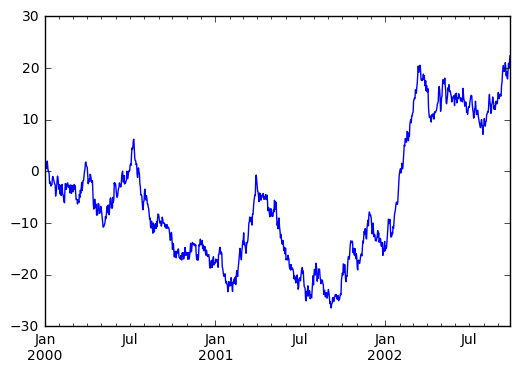

In [120]:
ts.plot()

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, 
                  columns=['A', 'B', 'C', 'D'])

In [122]:
df.head()

,A,B,C,D
2000-01-01,-0.000713,-2.574034,-0.388043,0.586309
2000-01-02,0.563826,1.106371,-0.301467,-0.714620
2000-01-03,0.446526,0.014063,1.901294,0.011860
2000-01-04,0.910683,0.860130,1.732056,-0.173511
2000-01-05,1.711845,1.513547,-1.144574,-0.843210


In [123]:
df = df.cumsum()
df.head()

,A,B,C,D
2000-01-01,-0.000713,-2.574034,-0.388043,0.586309
2000-01-02,0.563112,-1.467662,-0.689511,-0.128311
2000-01-03,1.009638,-1.453600,1.211783,-0.116451
2000-01-04,1.920321,-0.593469,2.943840,-0.289962
2000-01-05,3.632166,0.920077,1.799266,-1.133172


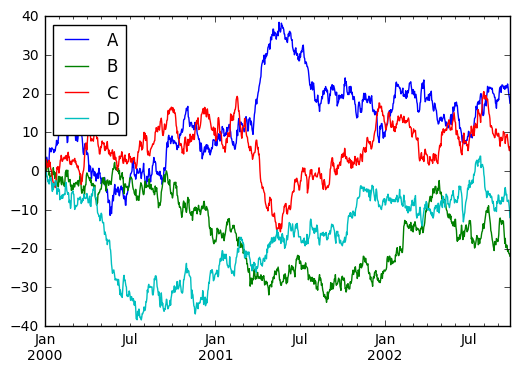

In [125]:
plt.figure()
df.plot()
plt.legend(loc='best')
plt.show()

### Getting Data In/Out

In [126]:
# CSV
# writing to a csv file
df.to_csv('foo.csv')

In [127]:
# readubg a csv file
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.000713,-2.574034,-0.388043,0.586309
1,2000-01-02,0.563112,-1.467662,-0.689511,-0.128311
2,2000-01-03,1.009638,-1.453600,1.211783,-0.116451
3,2000-01-04,1.920321,-0.593469,2.943840,-0.289962
4,2000-01-05,3.632166,0.920077,1.799266,-1.133172
5,2000-01-06,2.748270,2.232159,1.863808,-1.337885
6,2000-01-07,1.938135,2.435185,0.954061,-2.719192
7,2000-01-08,1.872872,1.011073,1.963047,-2.542641
8,2000-01-09,2.520290,0.242781,2.294733,-2.257144
9,2000-01-10,3.134156,-1.042070,2.817005,-3.297181


In [128]:
# HDF5
# Writing to a HDF5 store
df.to_hdf('foo.h5', 'df')

In [129]:
# Reading from a HDF5 store
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.000713,-2.574034,-0.388043,0.586309
2000-01-02,0.563112,-1.467662,-0.689511,-0.128311
2000-01-03,1.009638,-1.453600,1.211783,-0.116451
2000-01-04,1.920321,-0.593469,2.943840,-0.289962
2000-01-05,3.632166,0.920077,1.799266,-1.133172
2000-01-06,2.748270,2.232159,1.863808,-1.337885
2000-01-07,1.938135,2.435185,0.954061,-2.719192
2000-01-08,1.872872,1.011073,1.963047,-2.542641
2000-01-09,2.520290,0.242781,2.294733,-2.257144
2000-01-10,3.134156,-1.042070,2.817005,-3.297181
